In [2]:
from __future__ import print_function
from datahandling import access_db
from tinydb import Query, TinyDB
from matplotlib.pyplot import plot, figure, ylim, xlim, ylabel, xlabel, legend
from model_analysis import translate_model_code
from numpy import argmax
from model_scoring_func import get_all_names
from pandas import DataFrame
% matplotlib inline

In [3]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.set_style('ticks', {'font.family': 'Cambria'})

In [4]:
names = get_all_names()

In [5]:
sm_db = access_db(3, True)

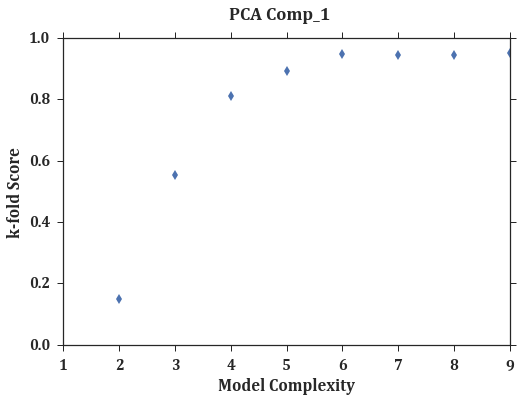

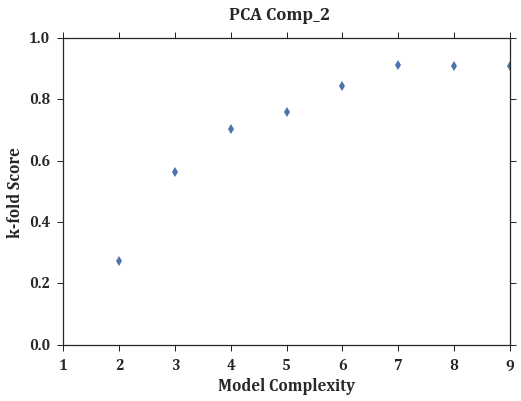

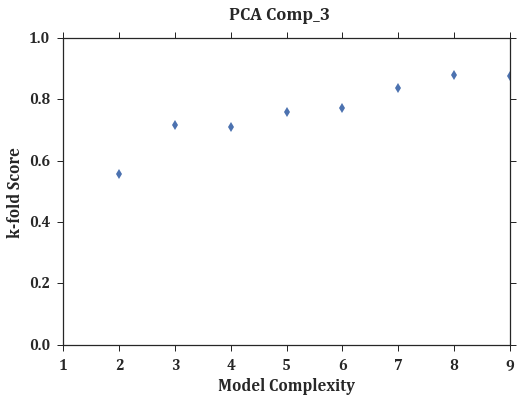

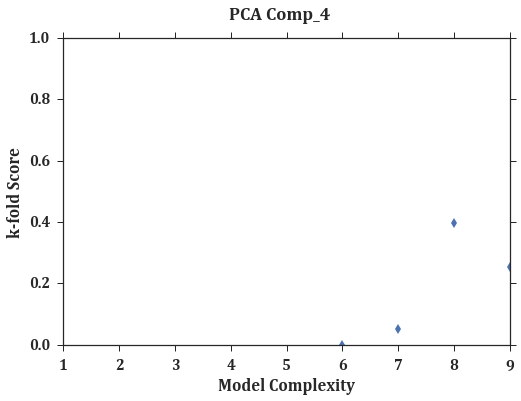

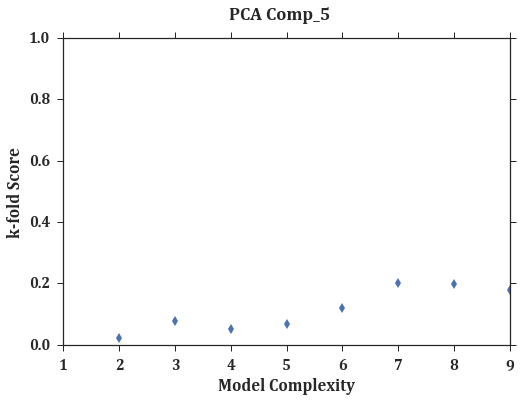

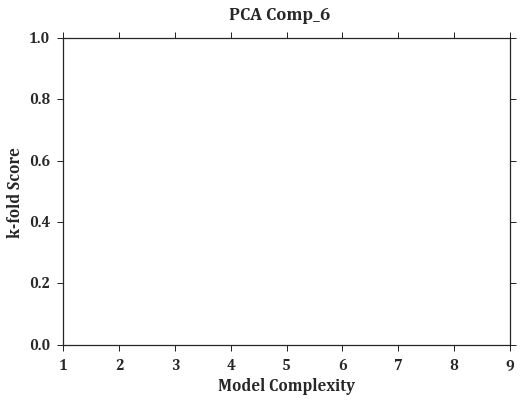

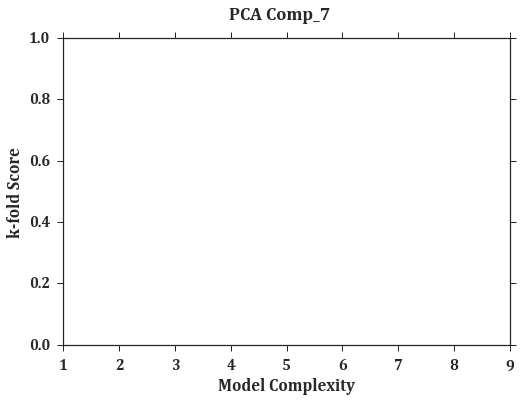

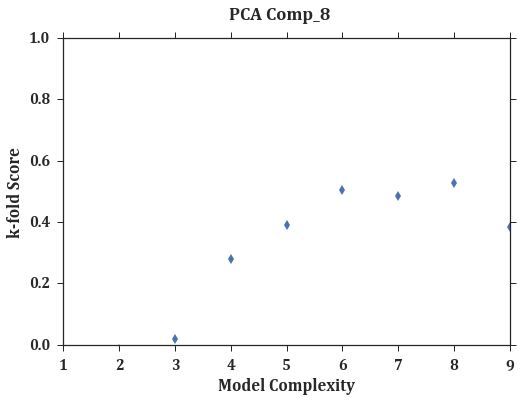

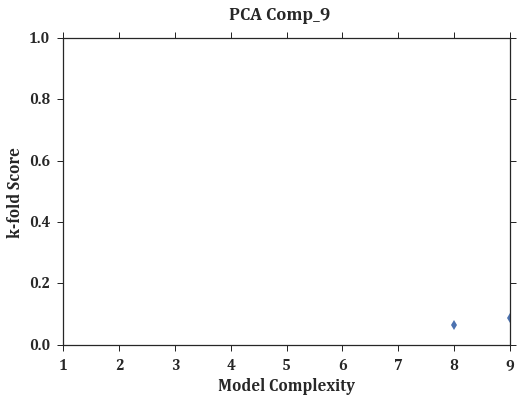

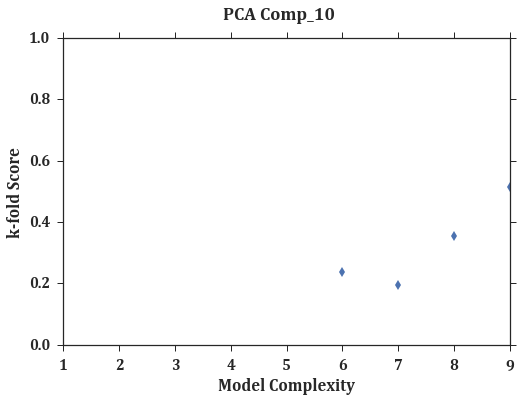

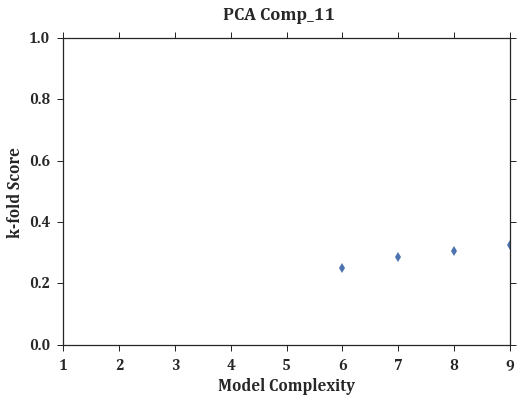

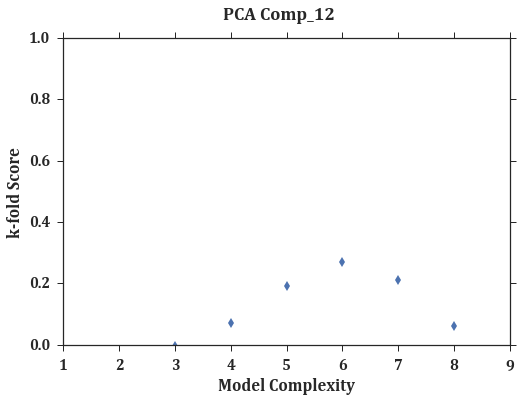

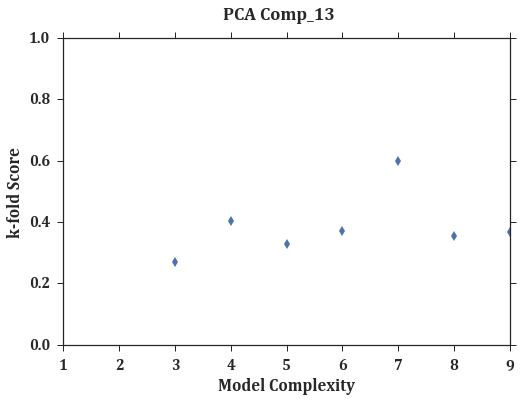

In [7]:
Q = Query()
use_lim = True

# names = [i for i in names if i in [u'rheomix final_deg_time_min']]

for i in names:
    equip, d_type = i.split(' ')
    
    top_db = access_db('Top_score_results_'+ equip + '_' + d_type, False)
               
    df = DataFrame(top_db.all())
    
    n_terms = list(df['n_terms'].values)
    scores = list(df['top_score'].values)
    mcodes = list(df['top_mcode'].values)
    
#     entry = sm_db.search((Q.equipment_name == equip) & (Q.data_type == d_type))
#     select_mcode = entry[0]['select_mcode']
#     select_score = entry[0]['select_score']
    
    fig = figure()
    plot(n_terms, scores, 'd')
    ylim([0.0, 1.0])
    ylabel('k-fold Score')
#     xlim([1.0, 28.0])
    xlabel('Model Complexity')
    
    ind_max = argmax(scores)
    
#     plot(len(select_mcode), select_score, 'o', markersize=10, label='Selected Model')
#     plot(n_terms[ind_max], scores[ind_max], 's', markersize=10, label='Max Score Model')
    
    fig.suptitle(i)
#     legend(frameon=True)
    
#     fig.savefig('Final_deg_time_scores_marked.pdf')

In [8]:
my_df = DataFrame(sm_db.all())

In [9]:
my_df = my_df[['data_type', 'equipment_name', 'select_score']]

In [10]:
sort_df = my_df.sort_values('select_score', ascending = False)

In [11]:
# my_df.to_csv('all_scores.csv')